In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = r'C:\Users\rj100\OneDrive\Documents\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = r'C:\Users\rj100\OneDrive\Documents\ssd_mobilenet_v3_large_coco_2020_01_14.tar\ssd_mobilenet_v3_large_coco_2020_01_14\ssd_mobilenet_v3_large_coco_2020_01_14\frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_names = r'C:\Users\rj100\OneDrive\Documents\labels.txt'
with open(file_names,'rt') as fpt:
    classLabels = fpt.read().strip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
len(classLabels)

80

In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001FC002D04E0>

In [8]:
# reading an image

img = cv2.imread(r'C:\Users\rj100\OneDrive\Pictures\dhoni.jpg')

In [9]:
ClassIndex , confidence, bbox = model.detect(img,confThreshold=0.5)

In [10]:
print(ClassIndex)

[[1]]


# The reason are we getting it [[1]] is 
## AS you would go back up,
['person', 'bicycle', 'car', 'motorbike', 'aeroplane',
 (1,          2      ,  3   ,4 ..........) & img is of our cool captain
let me corroborate it

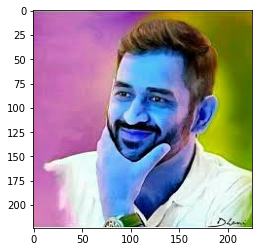

In [11]:
plt.imshow(img)

In [13]:
font_scale = 3
Font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), Font, fontScale = font_scale, color=(0,255,0),thickness=1)

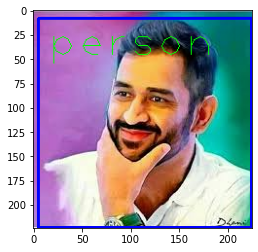

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))